In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data

y = iris.target

In [5]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

One versus all :
- email foldering : work, friend, framily, hobby
- medical diagrams: ill, not ill, cold flu
- weather: sunny, cloudy, rain, snow

Data set may be grouped into more than jsut 2 categories. how can we get an algo to make multiple cutoffs. One versus all!

One versus all:
treat at three seperate binary classification. seperate wanted group from all other groups
probability of h(x) = P(y=i | x, theta)
to classify: max h(theta)....easy!!
g1:
g2:
g3:

In [6]:
iris = DataFrame(x, columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [7]:
irist = DataFrame(y, columns=['Species'])

In [8]:
# give names to species, instead of numerics valuse
# split apply combine
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [9]:
irist['Species'] = irist['Species'].apply(flower)

In [10]:
irist.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [11]:
# combine the dfs
fulliris = pd.concat([iris, irist],axis=1)

In [12]:
fulliris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


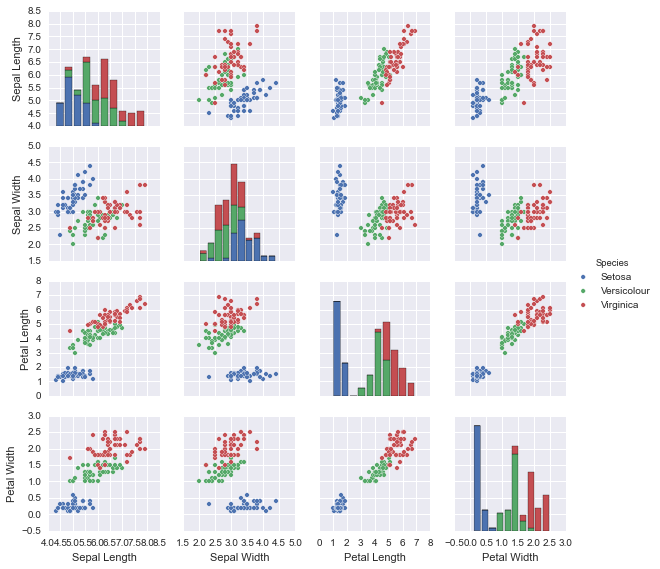

In [13]:
# quick pair plot
sns.pairplot(fulliris, hue='Species', kind='scatter', size=2)

We can already see that setosa is very distinct!

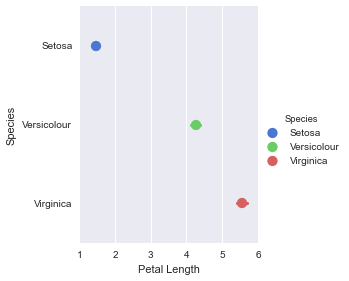

In [14]:
sns.factorplot(x='Petal Length', y = 'Species',data=fulliris, hue='Species', palette="muted")

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [17]:
# create a logistic regressionc lass object
logreg = LogisticRegression()

#split into test and train
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.4, random_state=3)

In [18]:
# train with the train datasets
logreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [19]:
# now test models accuracy
from sklearn import metrics

In [20]:
# put predictions in ypred
ypred = logreg.predict(xtest)

In [21]:
# to know how accurate you are
print metrics.accuracy_score(ytest, ypred)

0.933333333333


Should we trust this accuracy?

##Now we can use knearest neighbors!

Given N training vectors, the algo identifies the nearest neihbors, regardless of labels.

if k = 3, we find three neighrest neighbor

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=6)

In [24]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=6, p=2, weights='uniform')

In [25]:
ypred = knn.predict(xtest)

In [26]:
print metrics.accuracy_score(ytest, ypred)

0.95


K = 6 did very well! lets attempt with K = 1

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
print metrics.accuracy_score(ytest, ypred)

0.966666666667


K = 1 did even better. Lets find the best one!

#Create a Method for this

In [34]:
krange = range(1,25)

accuracy = []

for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    
    accuracy.append(metrics.accuracy_score(ytest, ypred))

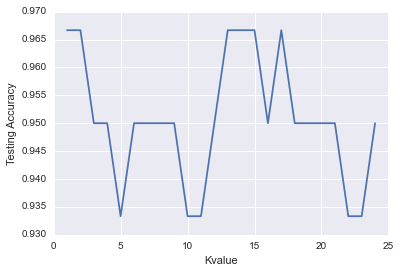

In [35]:
# plot the results
plt.plot(krange, accuracy)
plt.xlabel('Kvalue')
plt.ylabel('Testing Accuracy')

In [ ]:
# sees to be no function of the amount of k...